In [1]:
from IPython.display import YouTubeVideo

def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index = index - 1, list = playlist, width = 600, height = 350)

In [2]:
embed_video(1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data
    

In [4]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [5]:
%alias head powershell -command "& {Get-Content %s -Head 10}"
%head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


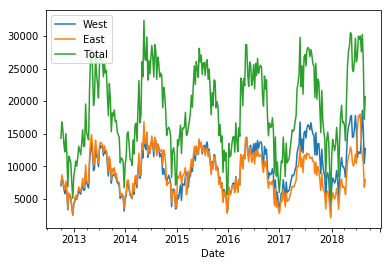

In [6]:
data.resample('W').sum().plot()

In [7]:
embed_video(2)

In [8]:
plt.style.use('seaborn')
ax = data.resample('W').sum().plot()


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [ ]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

In [ ]:
pivoted.plot(legend=False, alpha=0.01);

In [ ]:
embed_video(3)
#created git repository

In [ ]:
embed_video(4)
#nesukure .gitignore failo.